In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

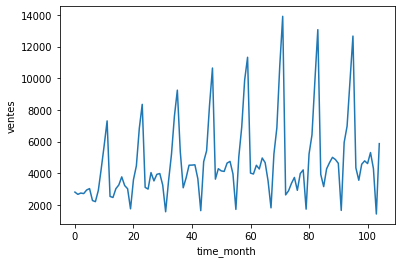

,time_month,ventes
0,1,2815
1,2,2672
2,3,2755
3,4,2721
4,5,2946


In [188]:
champagne = pd.read_csv('TP3champagne.csv', sep=';')
champagne.rename(columns={"Time ": "time_month"}, inplace=True)

# Preparing and showing a regular plot with Matplotlib Pyplot
plt.xlabel("time_month")
plt.ylabel("ventes")
plt.plot(champagne_copy.ventes)
plt.show()

champagne.head()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


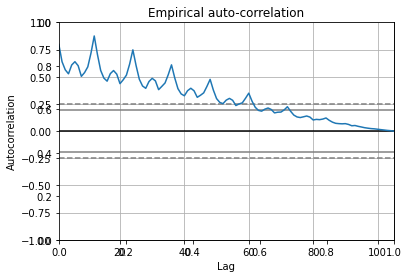

In [189]:
from pandas.plotting import autocorrelation_plot

# Giving a plot title, calling the autocorrelation function then showing the plot
plt.title("Empirical auto-correlation")
autocorrelation_plot(champagne)
plt.show()

In [190]:
champagne.head()

,time_month,ventes
0,1,2815
1,2,2672
2,3,2755
3,4,2721
4,5,2946


In [191]:
from datetime import date
from dateutil.relativedelta import relativedelta

# Convert your daily column from just string to DateTime (skip if already done)
champagne['time_month'] = champagne['time_month'].map(lambda x : (date(2000, 1, 1) + relativedelta(months=x)))
#champagne['new_time_month'] = pd.to_datetime('2010-' + champagne.time_month.astype(int).astype(str) + '-01', format = '%Y-%m-%d')
# Set the column 'Date' as index (skip if already done)
champagne = champagne.set_index('time_month')
# Specify datetime frequency
champagne = champagne.asfreq('MS')

In [192]:
champagne.head(10)

,ventes
time_month,
2000-02-01,2815
2000-03-01,2672
2000-04-01,2755
2000-05-01,2721
2000-06-01,2946
2000-07-01,3036
2000-08-01,2282
2000-09-01,2212
2000-10-01,2922


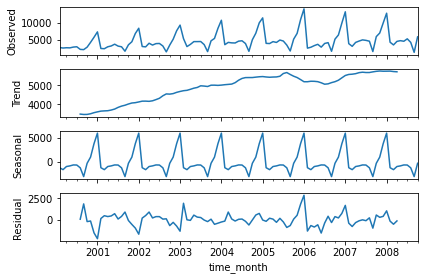

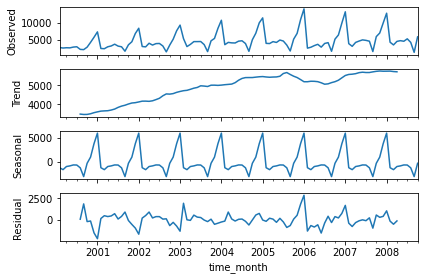

In [193]:
import statsmodels.api as sm

dta = champagne
# deal with missing values. see issue
dta.ventes.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.ventes)
res.plot()